In [1]:
# KGML Documentation:
# https://www.kegg.jp/kegg/xml/docs/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
# Tutorial: https://bioservices.readthedocs.io/en/master/kegg_tutorial.html
from bioservices.kegg import KEGG

In [3]:
# create KEGG object
k = KEGG()

In [4]:
# Set organism as Saccharomyces cerevisiae (budding yeast)
k.organism = "sce"

In [5]:
# Metabolic pathways - Saccharomyces cerevisiae (budding yeast)
# https://www.genome.jp/dbget-bin/www_bget?pathway+sce01100
# https://www.genome.jp/dbget-bin/get_linkdb?-t+genes+path:sce01100
pathId = 'path:sce01100'

In [6]:
# parse the KGML pathway
res = k.parse_kgml_pathway(pathId)
res.keys()

dict_keys(['relations', 'entries'])

In [7]:
print(len(res['relations']), len(res['entries']))

0 6340


In [8]:
# convert the result to a pandas dataframe
df = pd.DataFrame(res['entries'])
df.head()

,id,name,type,link,gene_names
0,6959,cpd:C22161,compound,http://www.kegg.jp/dbget-bin/www_bget?C22161,C22161
1,6958,cpd:C02147,compound,http://www.kegg.jp/dbget-bin/www_bget?C02147,C02147
2,6957,cpd:C02051,compound,http://www.kegg.jp/dbget-bin/www_bget?C02051,C02051
3,6952,cpd:C04487,compound,http://www.kegg.jp/dbget-bin/www_bget?C04487,C04487
4,6951,cpd:C01211,compound,http://www.kegg.jp/dbget-bin/www_bget?C01211,C01211


In [9]:
# types of entries
df['type'].unique()

array(['compound', 'ortholog', 'gene', 'map'], dtype=object)

In [10]:
# The number of unique genes
# The result is align with https://www.genome.jp/dbget-bin/get_linkdb?-t+genes+path:sce01100
names = []
for e in res['entries']:
    if e['type'] == 'gene' and e['name'] not in names:
        # split the elements with more than one gene
        for name in e['name'].split():
            names.append(name)
print(len(names))
# print unique genes
print(len(set(names)))

1226
757


In [11]:
# example: first 5 genes
names[:5]

['sce:YJR131W', 'sce:YLR057W', 'sce:YOR196C', 'sce:YLR239C', 'sce:YJL046W']

In [12]:
df[df['type']=='gene']

,id,name,type,link,gene_names
4549,2664,sce:YJR131W,gene,http://www.kegg.jp/dbget-bin/www_bget?sce:YJR131W,MNS1
4550,6961,sce:YLR057W,gene,http://www.kegg.jp/dbget-bin/www_bget?sce:YLR057W,MNL2
4552,6921,sce:YOR196C,gene,http://www.kegg.jp/dbget-bin/www_bget?sce:YOR196C,LIP5
4553,6922,sce:YOR196C,gene,http://www.kegg.jp/dbget-bin/www_bget?sce:YOR196C,LIP5
4554,6926,sce:YLR239C,gene,http://www.kegg.jp/dbget-bin/www_bget?sce:YLR239C,LIP2
...,...,...,...,...,...
6160,2510,sce:YHL003C sce:YKL008C sce:YPL087W,gene,http://www.kegg.jp/dbget-bin/www_bget?sce:YHL0...,LAG1...
6164,6932,sce:YDR440W sce:YHR109W sce:YHR119W sce:YJL168C,gene,http://www.kegg.jp/dbget-bin/www_bget?sce:YDR4...,"DOT1, KMT4, PCH1..."
6165,6933,sce:YDR440W sce:YHR109W sce:YHR119W sce:YJL168C,gene,http://www.kegg.jp/dbget-bin/www_bget?sce:YDR4...,"DOT1, KMT4, PCH1..."
6166,6934,sce:YDR440W sce:YHR109W sce:YHR119W sce:YJL168C,gene,http://www.kegg.jp/dbget-bin/www_bget?sce:YDR4...,"DOT1, KMT4, PCH1..."


In [13]:
df[df['type']=='compound']

,id,name,type,link,gene_names
0,6959,cpd:C22161,compound,http://www.kegg.jp/dbget-bin/www_bget?C22161,C22161
1,6958,cpd:C02147,compound,http://www.kegg.jp/dbget-bin/www_bget?C02147,C02147
2,6957,cpd:C02051,compound,http://www.kegg.jp/dbget-bin/www_bget?C02051,C02051
3,6952,cpd:C04487,compound,http://www.kegg.jp/dbget-bin/www_bget?C04487,C04487
4,6951,cpd:C01211,compound,http://www.kegg.jp/dbget-bin/www_bget?C01211,C01211
...,...,...,...,...,...
6173,6949,cpd:C01181,compound,http://www.kegg.jp/dbget-bin/www_bget?C01181,C01181
6174,6953,cpd:C22160,compound,http://www.kegg.jp/dbget-bin/www_bget?C22160,C22160
6175,6954,cpd:C22159,compound,http://www.kegg.jp/dbget-bin/www_bget?C22159,C22159
6176,6955,cpd:C15973,compound,http://www.kegg.jp/dbget-bin/www_bget?C15973,C15973


In [14]:
df[df['type']=='ortholog']

,id,name,type,link,gene_names
8,6941,ko:K11703 ko:K13646,ortholog,http://www.kegg.jp/dbget-bin/www_bget?K11703+K...,K11703...
9,6940,ko:K00473 ko:K13645 ko:K13647,ortholog,http://www.kegg.jp/dbget-bin/www_bget?K00473+K...,K00473...
10,6939,ko:K00471,ortholog,http://www.kegg.jp/dbget-bin/www_bget?K00471,K00471
11,6936,ko:K00474,ortholog,http://www.kegg.jp/dbget-bin/www_bget?K00474,K00474
45,6839,ko:K08912 ko:K08913 ko:K08914 ko:K08915 ko:K08...,ortholog,http://www.kegg.jp/dbget-bin/www_bget?K08912+K...,K08912...
...,...,...,...,...,...
4544,6917,ko:K18821,ortholog,http://www.kegg.jp/dbget-bin/www_bget?K18821,K18821
4545,1657,ko:K03800,ortholog,http://www.kegg.jp/dbget-bin/www_bget?K03800,K03800
4546,1656,ko:K23763,ortholog,http://www.kegg.jp/dbget-bin/www_bget?K23763,K23763
4547,1655,ko:K23756,ortholog,http://www.kegg.jp/dbget-bin/www_bget?K23756,K23756


In [15]:
df[df['type']=='map']

,id,name,type,link,gene_names
6178,4901,path:map00943,map,http://www.kegg.jp/dbget-bin/www_bget?map00943,Isoflavonoid biosynthesis
6179,44,path:map00623,map,http://www.kegg.jp/dbget-bin/www_bget?map00623,Toluene degradation
6180,68,path:sce00350,map,http://www.kegg.jp/dbget-bin/www_bget?sce00350,Tyrosine metabolism
6181,118,path:map00525,map,http://www.kegg.jp/dbget-bin/www_bget?map00525,Acarbose and validamycin biosynthesis
6182,1512,path:map00624,map,http://www.kegg.jp/dbget-bin/www_bget?map00624,Polycyclic aromatic hydrocarbon degradation
...,...,...,...,...,...
6335,6881,path:map00998,map,http://www.kegg.jp/dbget-bin/www_bget?map00998,Biosynthesis of secondary metabolites - other ...
6336,69,path:map00572,map,http://www.kegg.jp/dbget-bin/www_bget?map00572,Arabinogalactan biosynthesis - Mycobacterium
6337,6104,path:sce00650,map,http://www.kegg.jp/dbget-bin/www_bget?sce00650,Butanoate metabolism
6338,4870,path:sce00561,map,http://www.kegg.jp/dbget-bin/www_bget?sce00561,Glycerolipid metabolism


## test code

In [16]:
# get all enzyme to enzyme relations
df_all = pd.DataFrame()
for map_name in df[df['type']=='map']['name']:
    if 'sce' in map_name:
        res = k.parse_kgml_pathway(map_name)
    elif 'map' in map_name:
        try:
            map_name = map_name.replace('map', 'ko')
            res = k.parse_kgml_pathway(map_name)
        except:
            print("{} can't be retrieved".format(map_name))
    else:
        print(map_name)
    df_r = pd.DataFrame(res['relations'])
#     if 'link' in df_r.columns:
#         df_all = pd.concat([df_all, df_r[df_r['link']=='ECrel']])
    if not df_r.empty:
        df_all = pd.concat([df_all, df_r[df_r['link'] != 'maplink']])
    else:
        print("{} has no 'links' column.\t its colunms are {}".format(map_name, df_r.columns))

path:ko00533 has no 'links' column.	 its colunms are Index([], dtype='object')
path:ko00121 has no 'links' column.	 its colunms are Index([], dtype='object')
path:sce00514 has no 'links' column.	 its colunms are Index([], dtype='object')
path:ko00196 has no 'links' column.	 its colunms are Index([], dtype='object')
path:sce01040 has no 'links' column.	 its colunms are Index([], dtype='object')
path:sce00511 has no 'links' column.	 its colunms are Index([], dtype='object')
path:ko00231 can't be retrieved
path:ko00966 has no 'links' column.	 its colunms are Index([], dtype='object')
path:ko00195 has no 'links' column.	 its colunms are Index([], dtype='object')
path:ko00534 has no 'links' column.	 its colunms are Index([], dtype='object')


In [18]:
pd.concat([df_all['entry1'], df_all['entry2']]).unique().shape

(497,)

In [19]:
# print(k.get("path:map00525"))

In [20]:
# k.parse_kgml_pathway('path:ko00525')

In [21]:
# can't parse 'map'
try:
    k.parse_kgml_pathway("path:map00525")
except:
    print('failed')

failed


In [22]:
# print(k.get("path:hsa04014"))

In [23]:
# k.parse_kgml_pathway("path:hsa04014")

In [24]:
# create the colormap. 
# https://matplotlib.org/gallery/images_contours_and_fields/custom_cmap.html
# positive: red
# negative: green
# absolute value: intensity of the color

from matplotlib.colors import LinearSegmentedColormap, DivergingNorm

cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.1),
                   (1.0, 1.0, 1.0)),

         'blue': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'green':  ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0))
        }
ccmap = LinearSegmentedColormap('redGreen', cdict)

In [25]:
def change_scale(eig):
    # smallest coefficient
    vmin = np.amin(eig[1])
    # largest coefficient
    vmax = np.amax(eig[1])
    if vmin*vmax < 0:
        v = max(abs(vmin), abs(vmax))
        vmin = -v
        vmax = v
    # if vmin and vmax have the same sign, the colorbar can't be symetrical.
    return vmin, vmax

In [26]:
def draw_sub(k, eig, G, layout, ccmap, vmin, vmax):
    i = np.argpartition(eig[0], k)[k]
    v = eig[1][:, i].T.tolist()[0]
    # node_color is the coefficient of eigenvectors 
    nx.draw(G, layout, node_size=100, node_color=v, edge_color="#cccccc", cmap=ccmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.colorbar(sm)

In [27]:
G = nx.from_pandas_edgelist(df=df_all, source='entry1', target='entry2')
L = nx.laplacian_matrix(G, nodelist=sorted(G.nodes()))
eig = np.linalg.eig(L.todense())
layout = nx.spring_layout(G, k=0.05, iterations=50, seed=2)

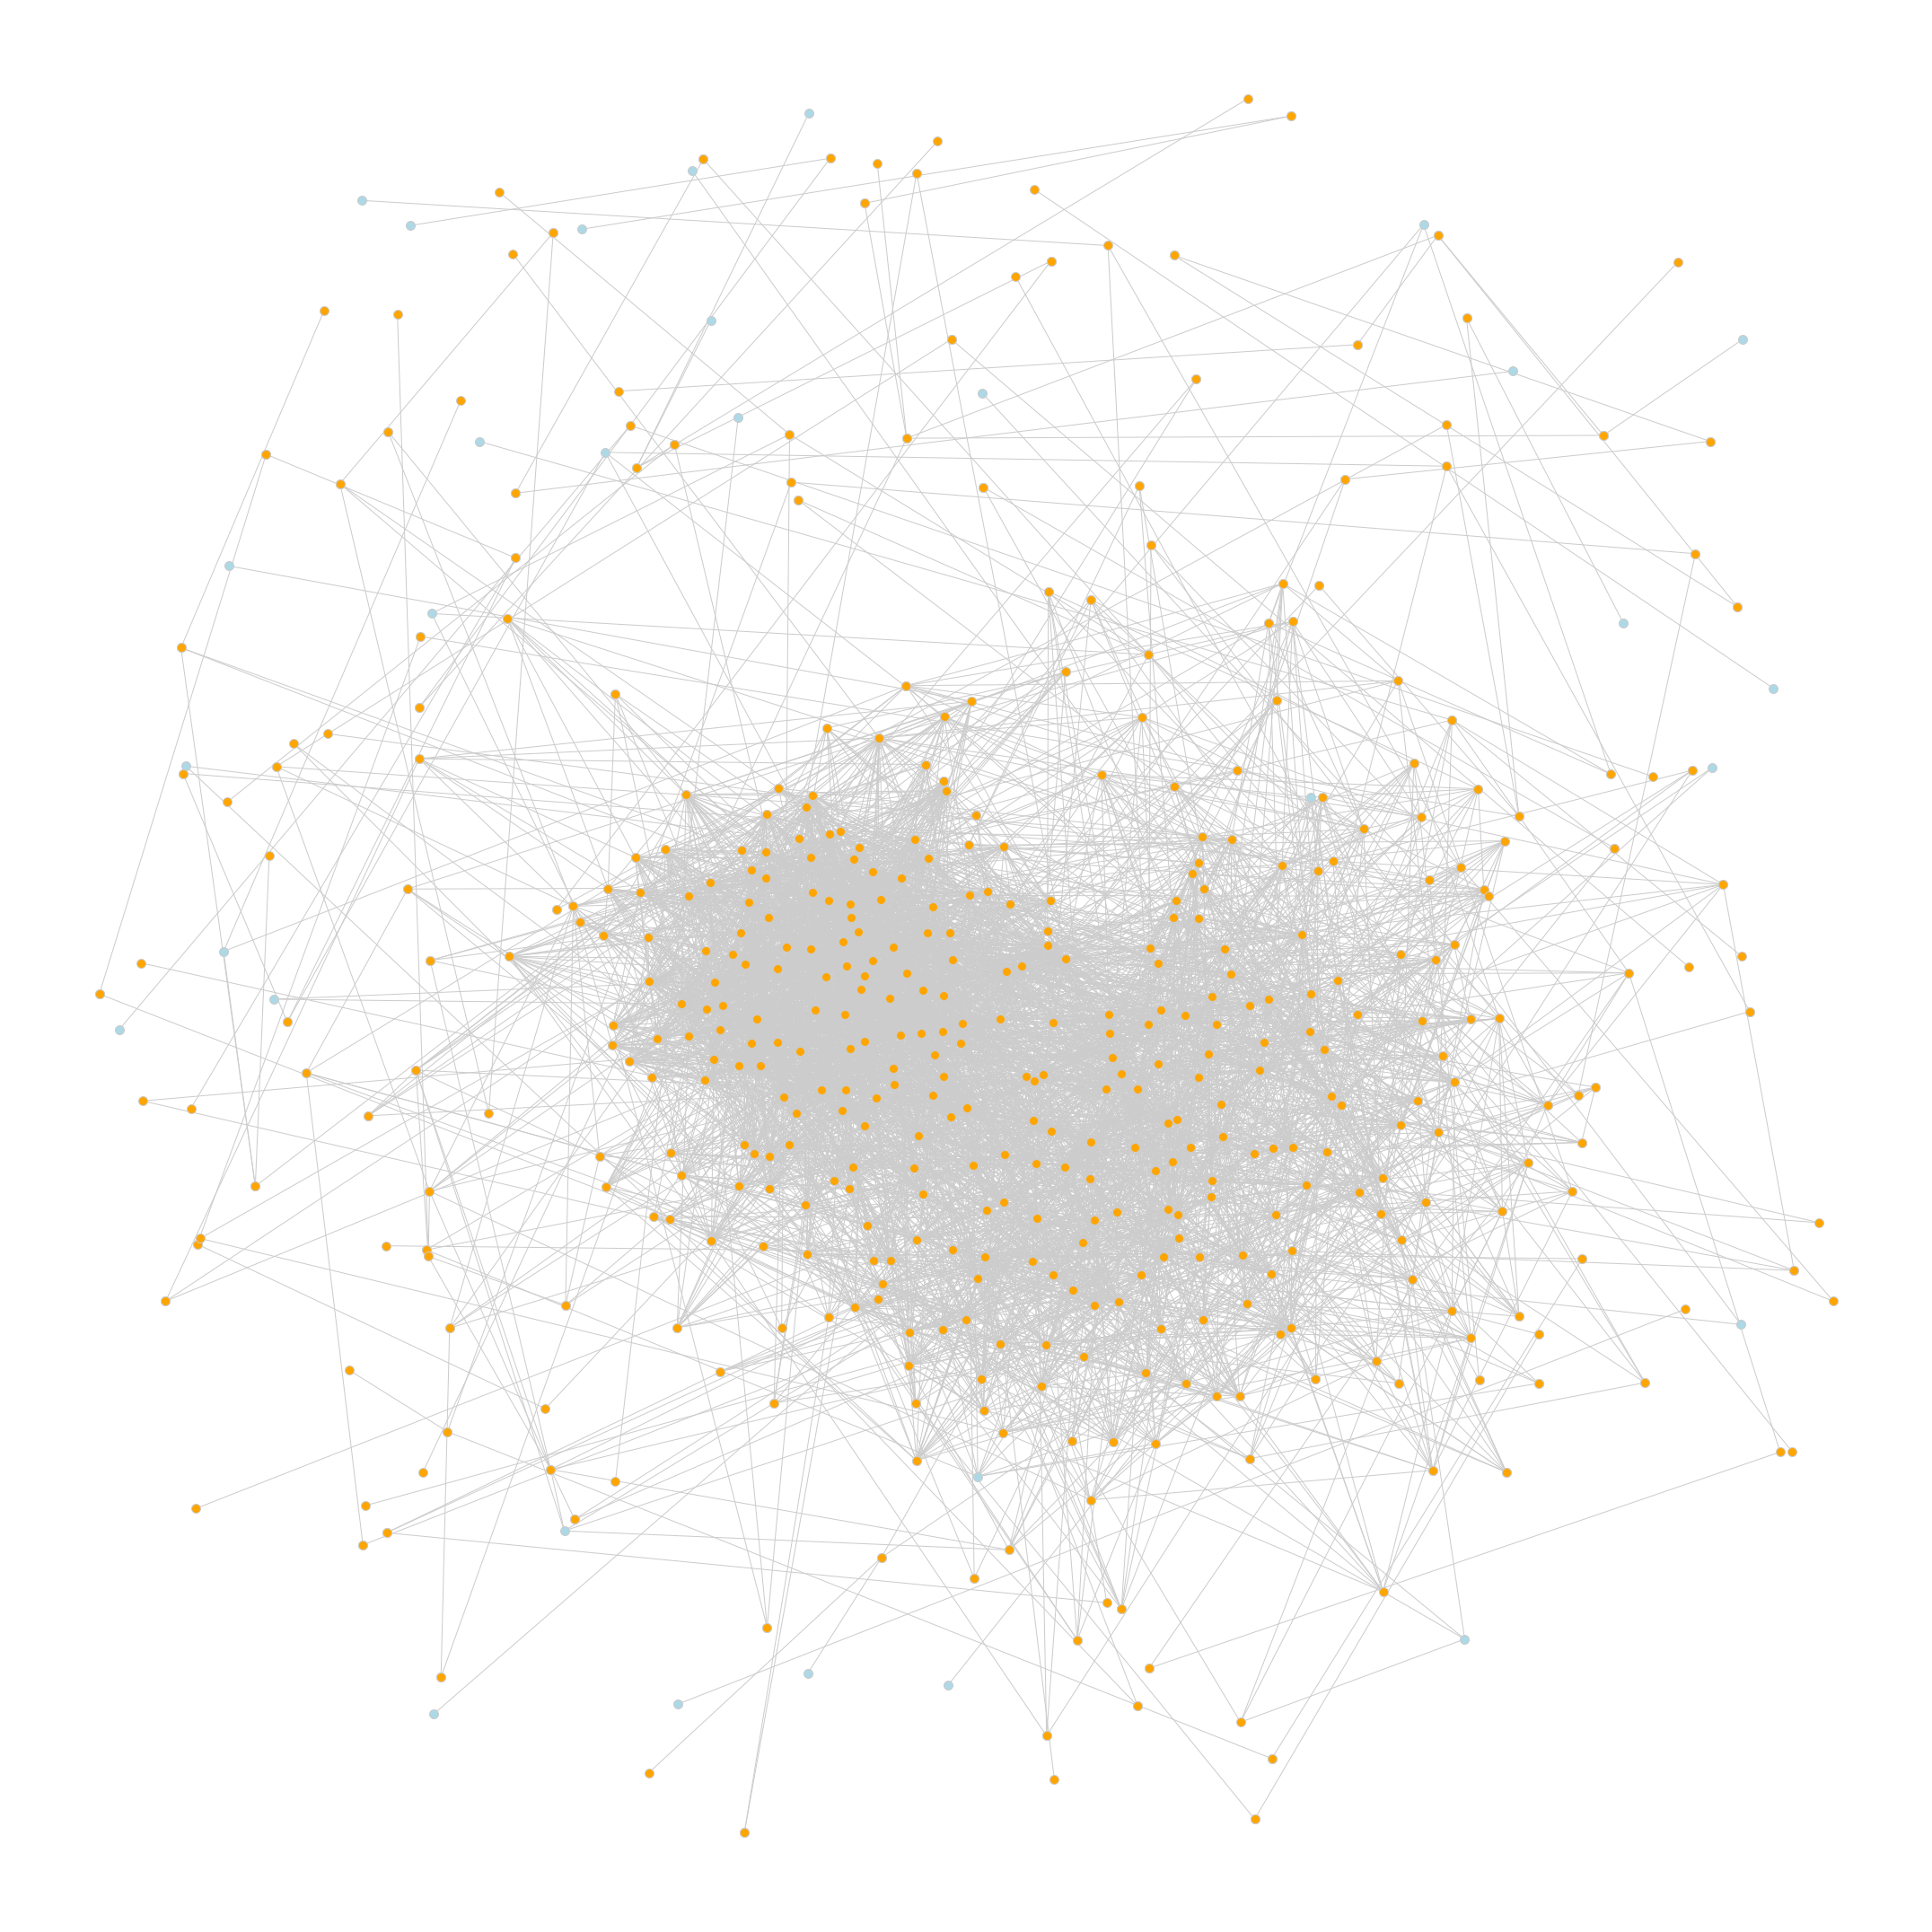

In [28]:
plt.rc('figure', figsize=(30, 30))
s = 5/np.sqrt(G.order())
e1 = list(df_all.entry1.unique())
e2 = list(df_all.entry2.unique())
layout = nx.spring_layout(G, k=s, iterations=20, seed=2)
nx.draw_networkx_nodes(G, layout, nodelist=e1, node_color='lightblue', node_size=100, edgecolors='#cccccc')
nx.draw_networkx_nodes(G, layout, nodelist=e2, node_color='orange', node_size=100, edgecolors="#cccccc")
nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")
plt.axis('off')
plt.tight_layout()
# plt.savefig('../images/main.png')
plt.show()

In [141]:
# some bugs exist
k_lst = [0, 1, 2, len(eig[0])-1]
vmin, vmax = change_scale(eig)
for i, k in enumerate(k_lst):
    plt.subplot(2,2,i+1)
    draw_sub(k, eig, G, layout, ccmap, vmin, vmax)
plt.tight_layout()
plt.show()